In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv


In [2]:
# Let's get a glimpse of the first 5 values of the dataset
df=pd.read_csv('/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
# Let's check whether the data contains any null values
df.isnull().sum()

# In this case, only the default column has null values (450). The rest of the columns have no null values.

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [4]:
# To check the total number of values in the dataset
df.value_counts()

# In this case there are 700 values in the dataset that are non-empty.

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [5]:
# Let's delete all the 450 null values in the default column
df=df.dropna()


In [6]:
# All null values have been successfully deleted.
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='income'>

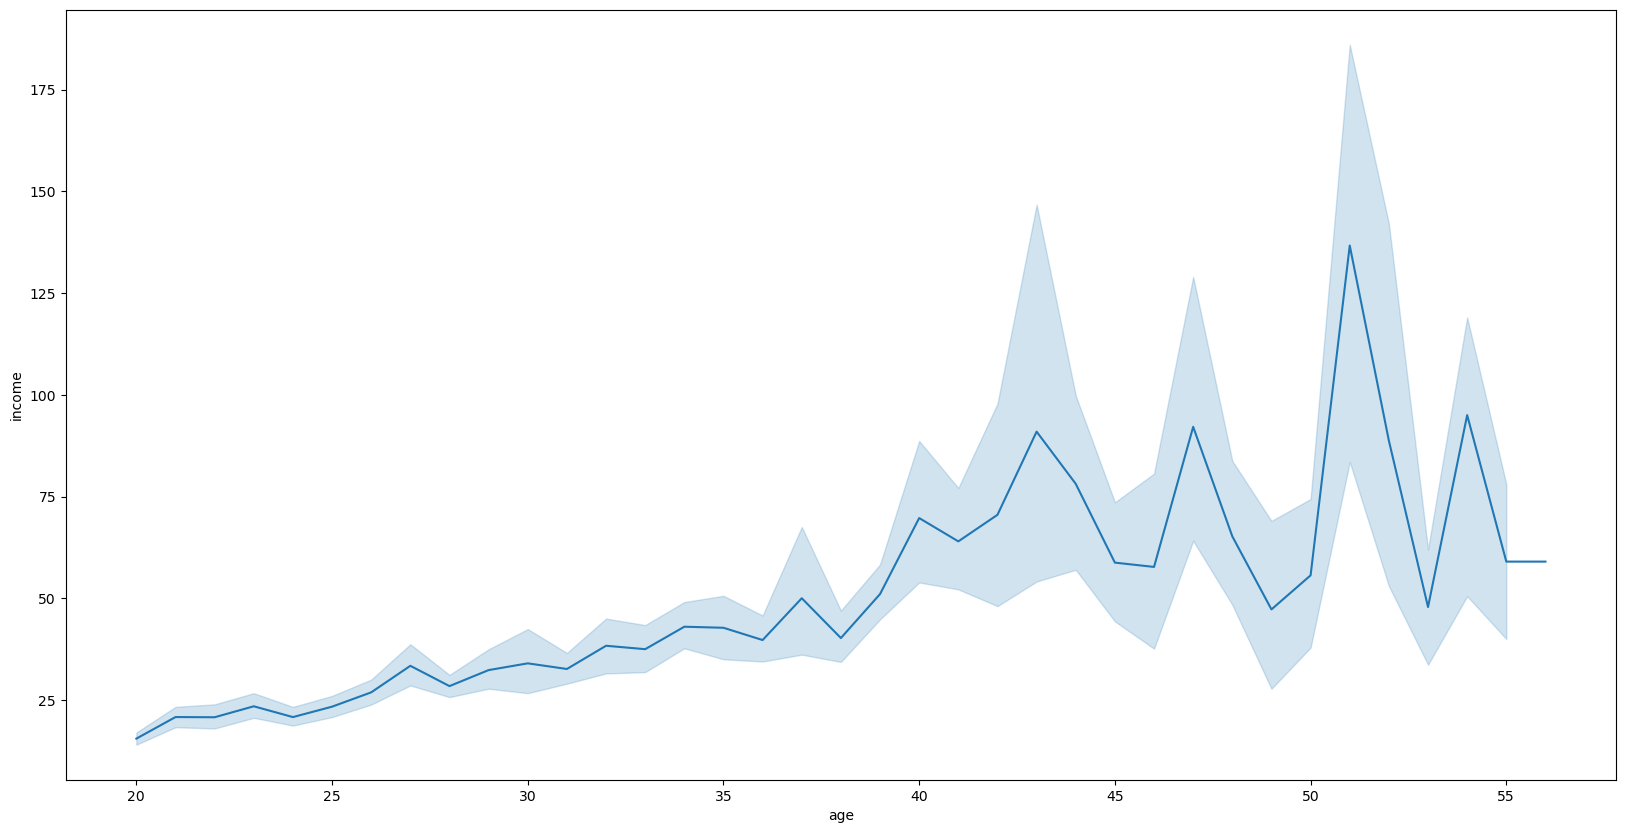

In [7]:
# Let's analyse whether there are any correlations between the columns using visualization

## Relationship between age and income:
fig,ax=plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='income',data=df,ax=ax)

<AxesSubplot:xlabel='age', ylabel='debtinc'>

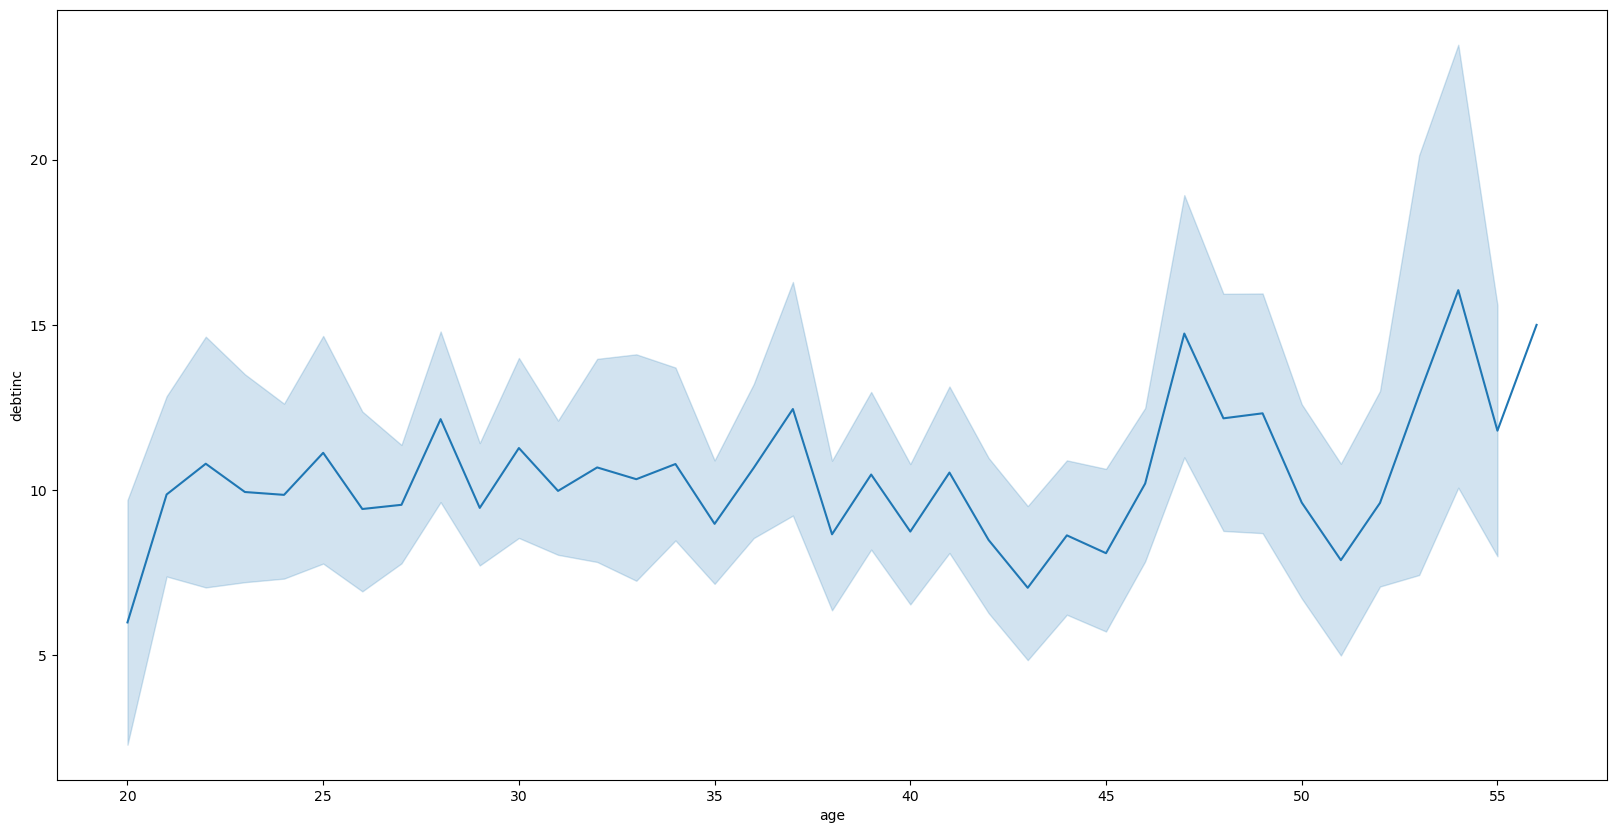

In [8]:
# Relationship between age and debt-to-income ratio:
fig,ax=plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

In [9]:
# Let's analyse the values of the default column
## It's our most important datapoint as it will show the likelihood of whether a customer will default on their loan or not.
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [10]:
# Let's create our training and test dataset
## Training data is always larger than test data (70/30 or 80/20)

# Let's create our 2 variables, x and y
x=df.drop(['default'],axis=1)  ## x-axis will have all data except the 'default' data, hence why we drop the default column from this axis.
y=df['default']

In [11]:
# Let's split the above data into training and testing data (in this case test data will be 20%=0.2)

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
# The data contains both big whole numbers and small decimal numbers. Let's scale the data so that the ML algorithm doesn't return biased results.
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [15]:
# Let's create the ML model

## Random Forest
# Let's initialise the algorithm
rfc=RandomForestClassifier(n_estimators=200) #Decision Tree Algorithm will execute 200 times to create the Random Forest Algorithm






In [16]:
# RFC algorithm has been initialised, now let's fit in our data into the algorithm

rfc.fit(xtrain,ytrain)



RandomForestClassifier(n_estimators=200)

In [17]:
# Let's predict the score and check how well our model is performing

rfc.score(xtest,ytest)

0.8071428571428572

In [19]:
# (0.8 or 80% above could be a result of overfitting or underfitting)
## Let's use the Cross Validation Score in order to get the optimum values

rfc2=cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()


0.7857142857142858

In [20]:
## Let's try using SVM Model to check if we'll get better accuracy

sv=SVC()
sv.fit(xtrain,ytrain)



SVC()

In [21]:
# Let's get the score

sv.score(xtest,ytest)

0.7928571428571428

In [22]:
## 0.79 or 79% is similar to the best possible value we got with the Random Forest algorithm above when using the Cross Validation Score.
# Let's use GridSearchCv to get the best possible parameters for SVM

model=GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [23]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [24]:
# To get the best parameters from the solution above:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [25]:
# Let's now use the above values
model2=SVC(C=0.1,gamma=0.1,kernel='linear')

# Let's fit in the data
model2.fit(xtrain,ytrain)

# Let's get the score
model2.score(xtest,ytest)



0.8214285714285714

In [26]:
# Best accuracy is with SVM (0.82 or 82%)

In [28]:
# Let's now use Logistic Regression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)


0.8357142857142857

In [29]:
### Results with all 3 algorithms:
## Random Forest= 79%
## SVM= 82%
## Logistic Regression= 83%

<AxesSubplot:>

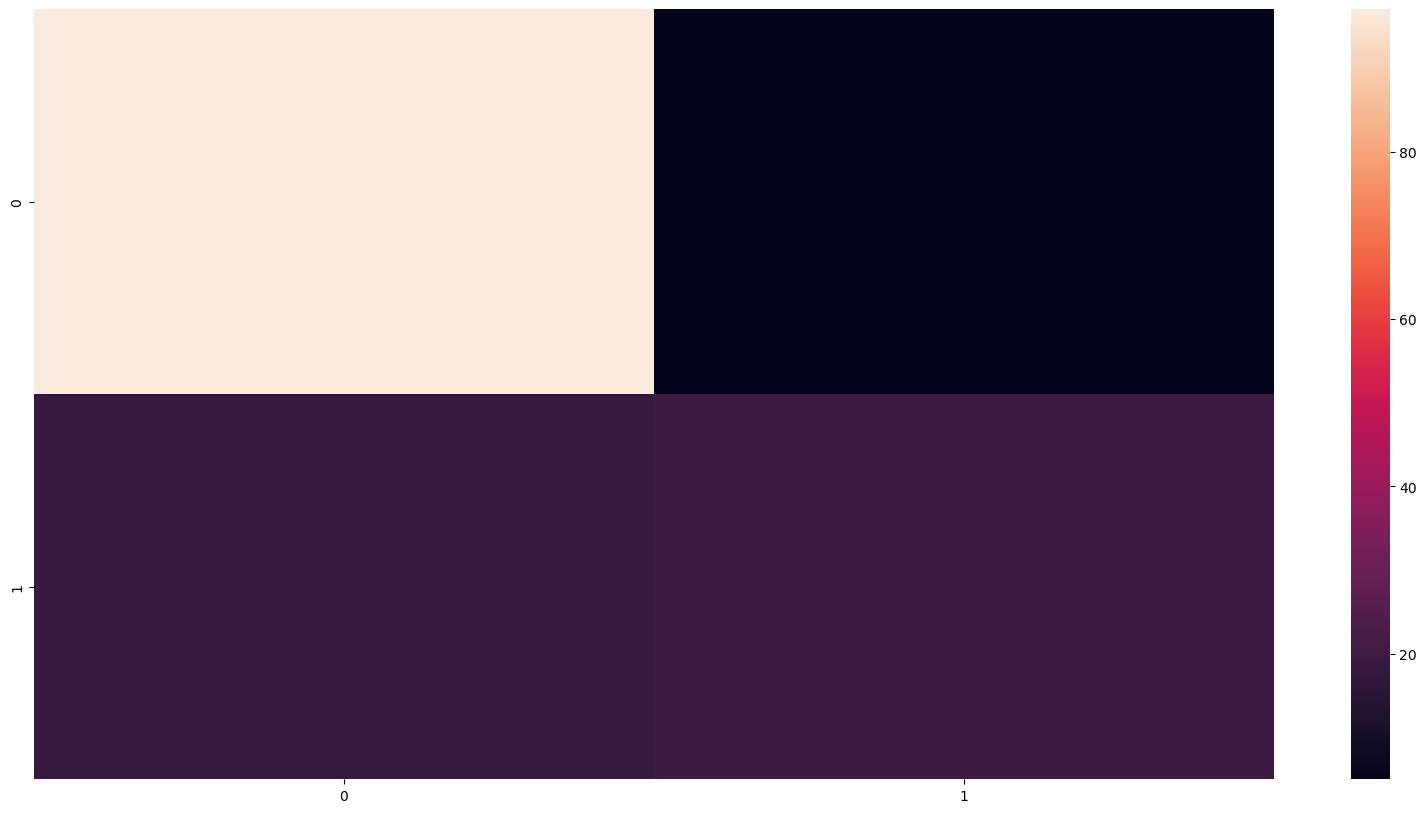

In [30]:
## Let's create a heat map (using Logistic Regression)

yp=lr.predict(xtest)
c=confusion_matrix(ytest,yp)
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)

In [ ]:
## The lighter the column, the better it is.